# BL40A2020 Wireless Communication Systems

## Week 2: Analog communication techniques

## Author: Pedro Nardelli

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Plot in pyhton

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

#### Library for symbolic calculation

[Sympy basics](https://www.scipy-lectures.org/packages/sympy.html)

[Sympy documentation](https://docs.sympy.org/latest/index.html)

#### Library for signal processing using numerical methods

[Scipy signal](https://docs.scipy.org/doc/scipy-1.0.0/reference/signal.html)

[Discrete Fourier transforms - scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html)

[Scikit-dsp-comm](https://scikit-dsp-comm.readthedocs.io/en/latest/nb_examples.html)

In [1]:
! pip install scikit-dsp-comm

In [2]:
import sympy as sp
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

# Message signal and transmitted signal

- Message: $m(t) \longrightarrow$ Baseband signal
- Transmitted $u_\mathrm{p}(t) \longrightarrow$  Passband signal 

## Message signal - Cosine
- $m(t) = A_\mathrm{m} \cos(2 \pi f_\mathrm{m}t)$

Let us define it in sympy:

In [3]:
#Sympy
#Symbols
m,t,Am,fm,f,w = sp.symbols('a, t, A_m, f_m, f,omega')
A,fc = sp.symbols('A,f_c')
#Generic function
g = sp.Function('g')

In [4]:
print('Message signal')
m = Am * sp.cos(2*sp.pi*fm*t) 
m

Message signal


## Double-sideband (DSB) suppressed carrier (SC)

From eq. (3.1) in the textbook.

- $u_\mathrm{DSB}(t) = A g(t) \cos\left(2\pi f_\mathrm{c}t\right)$, where $g(t)$ is a generic message signal.

In [5]:
print('DSB-SC modulation')
uDSB = A *g(t) * sp.cos(2*sp.pi*fc*t)
uDSB

DSB-SC modulation


Now, let's see how the DSB-modulated cosine message signal looks like.

In [6]:
print('Modulated signal')
modulated = uDSB.subs(g(t),m)
modulated

Modulated signal


**Numerical example**

In [7]:
#Amplitude and frequency of the message
amp_m = 2
freq_m = 1

print('Message')
m_example = m.subs(Am,amp_m).subs(fm,freq_m)
m_example

Message


In [8]:
#Amplitude and frequency of the carrier
amp_c = 2
freq_c = 200

print('DSB-SC modulated signal')
modulated_signal = uDSB.subs(fc,freq_c).subs(A,amp_c).subs(g(t),m_example)
modulated_signal

DSB-SC modulated signal


### Converting sympy to nympy via *[sp.lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html)*

In [9]:
#Converting sympy formulas to numpy to improve numerical evaluation
message =  sp.lambdify(t,m.subs(Am,amp_m ).subs(fm,freq_m),"numpy")
modulation_only = sp.lambdify(t,uDSB.subs(fc,freq_c).subs(A,amp_c).subs(g(t),1),"numpy")

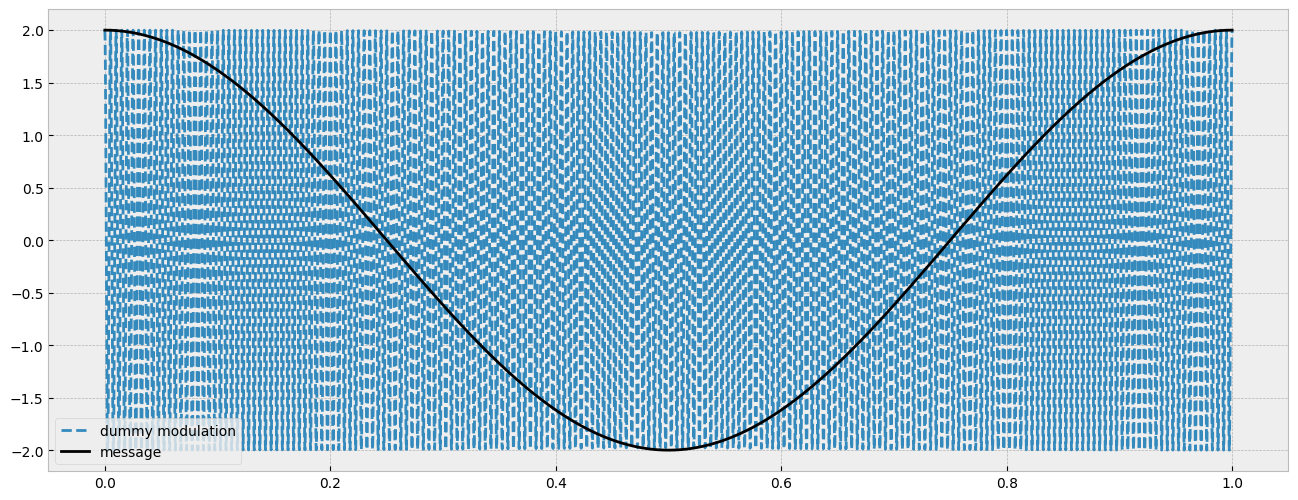

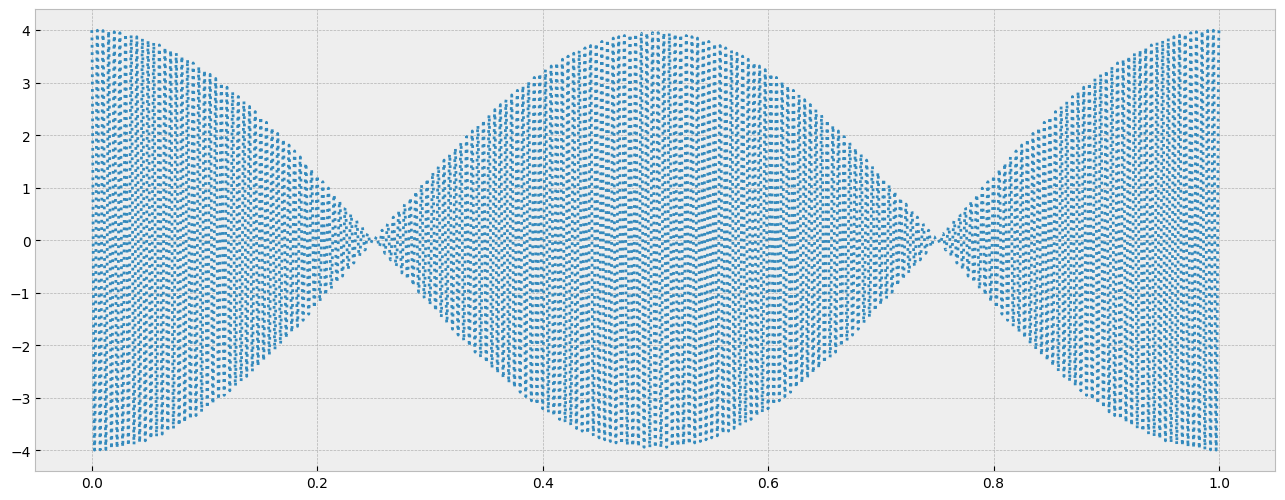

In [10]:
fp = 4000 #measurments per second
tp = np.linspace(0, 1, fp)
plt.rcParams['figure.figsize'] = 16, 6
plt.plot(tp, modulation_only(tp),linestyle='--',label='dummy modulation')
plt.plot(tp,  message(tp),'k-',label='message')
plt.legend(loc='lower left')
plt.show()
plt.plot(tp, modulation_only(tp)*message(tp),':')
plt.show()

Let's check if the modulation is working....

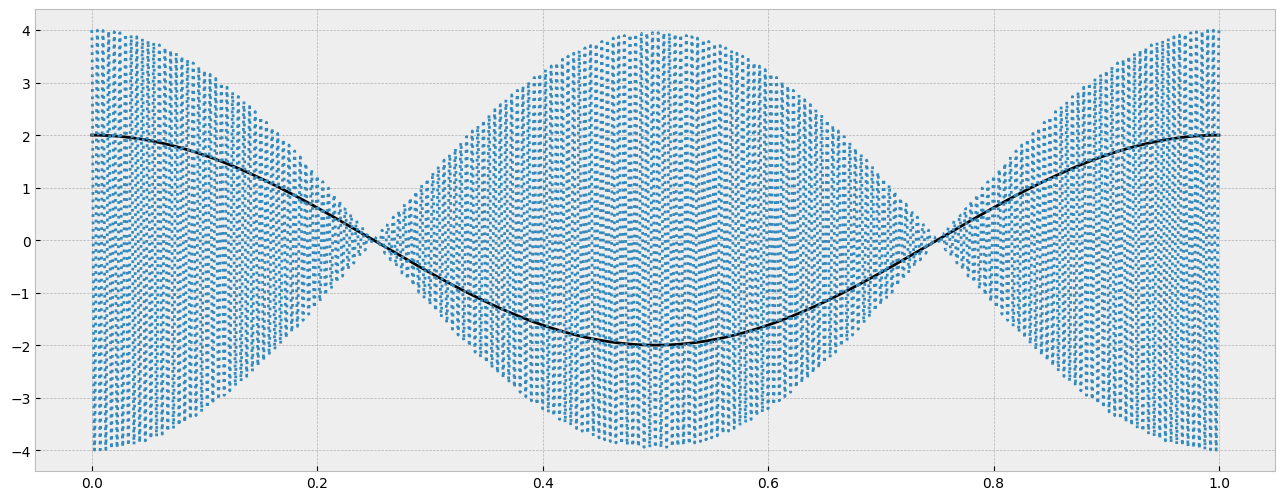

In [28]:
#plt.plot(tp, modulation(tp),linestyle='--')
plt.plot(tp,  message(tp),'k-',label='2*message')
plt.plot(tp, modulation_only(tp)*message(tp),':');

### Frequency analysis

We are going to use the library [Discrete Fourier transforms - scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html)

Let's see the message $m(t)$ in time and in frequency via [discrete Fourier transform function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq).

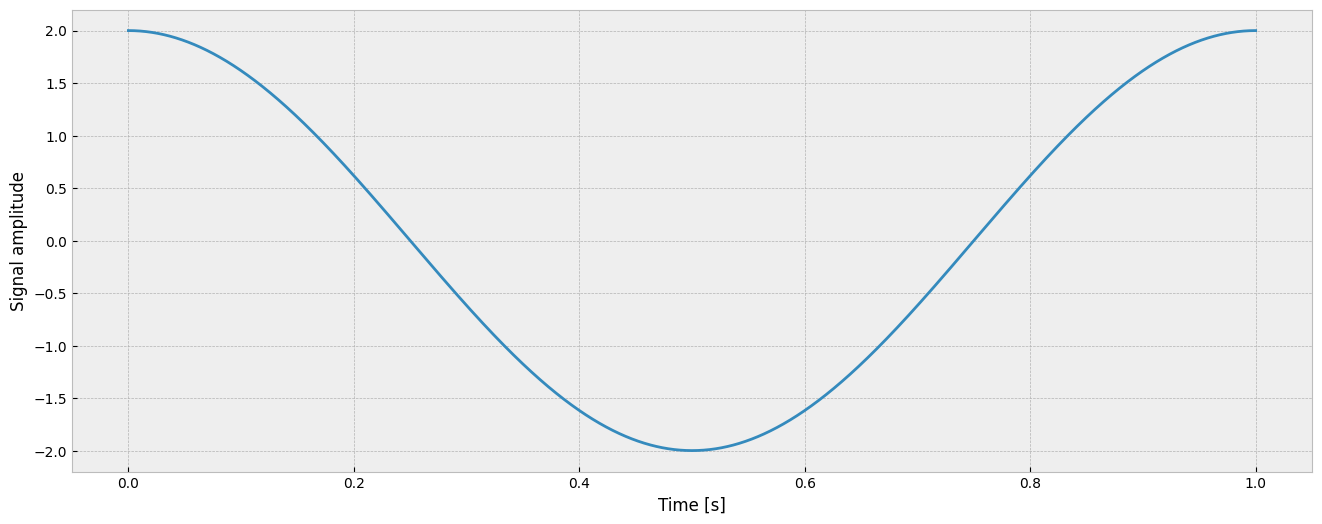

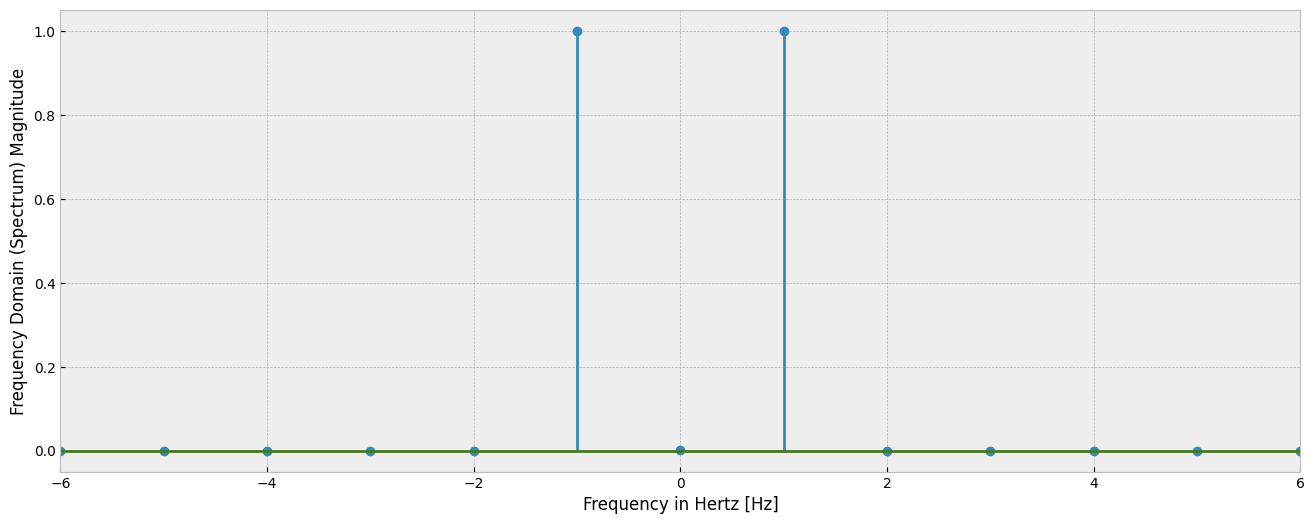

In [29]:
x = message(tp)
fig, ax = plt.subplots()
ax.plot(tp, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

X = fftpack.fft(x) / fp
freqs = fftpack.fftfreq(len(x)) * fp # number of measurements per second
fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X)) # slower, but more better looking
#ax.plot(freqs, np.abs(X),'x') #faster but not so nice visualization
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude');
ax.set_xlim(-freq_m -5, freq_m + 5);

Let's check the *dummy* modulation signal (without transmiting information).

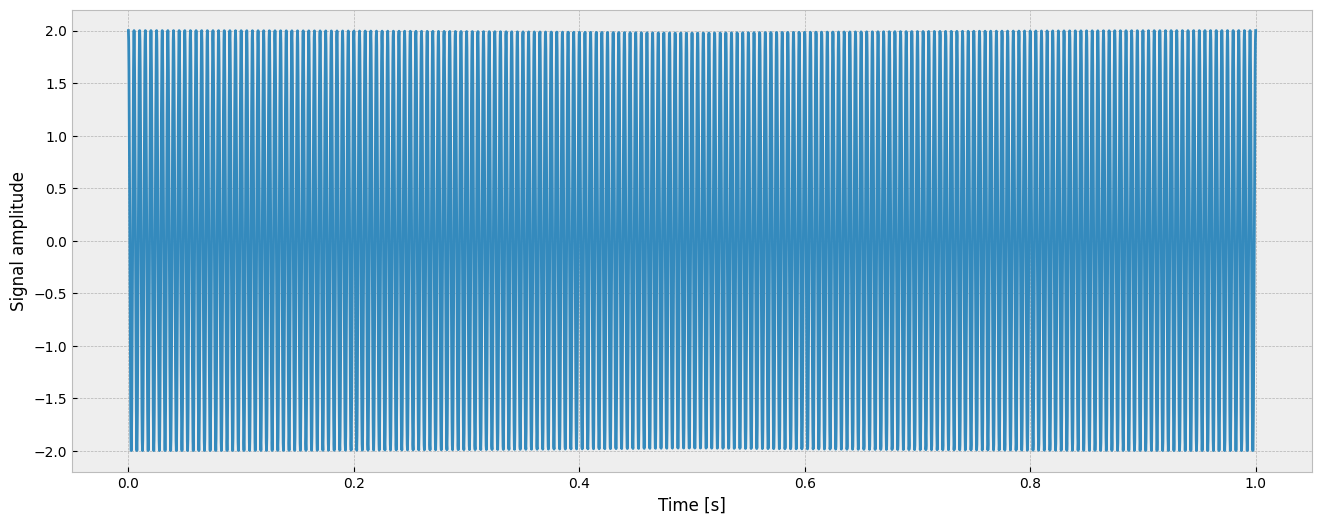

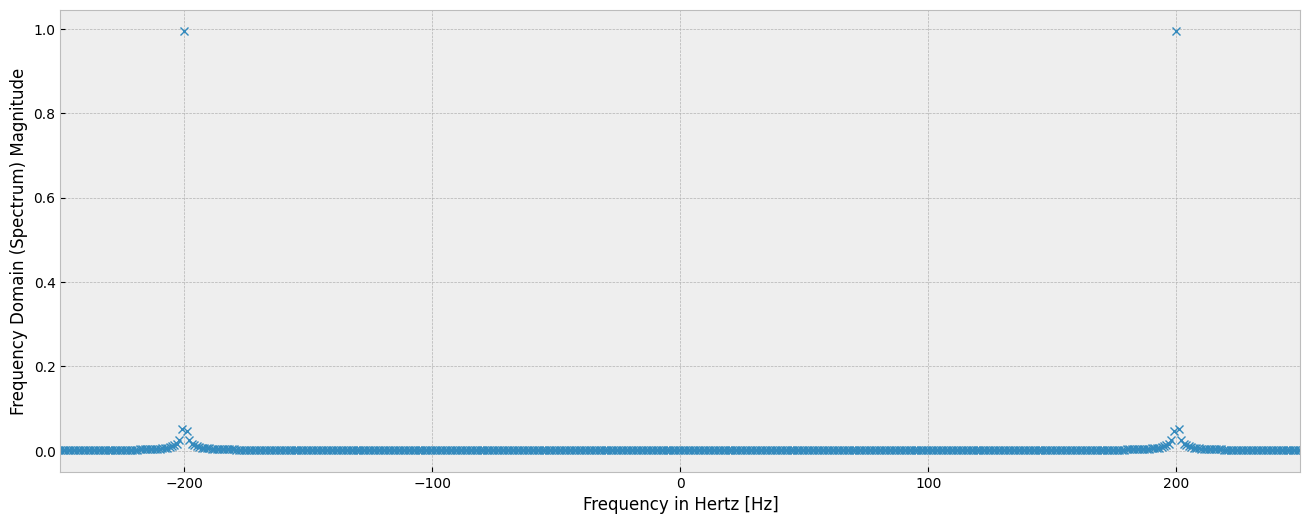

In [13]:
x = modulation_only(tp)
fig, ax = plt.subplots()
ax.plot(tp, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
X = fftpack.fft(x) / fp
freqs = fftpack.fftfreq(len(x)) * fp

fig, ax = plt.subplots()
#ax.stem(freqs, np.abs(X))
ax.plot(freqs, np.abs(X),'x')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-freq_c - 50, freq_c + 50);

And finally the modulated signal.

In [14]:
x = modulation_only(tp)*message(tp)
X = fftpack.fft(x)/ fp
absX = np.abs(X)
freqs = fftpack.fftfreq(len(x)) * fp

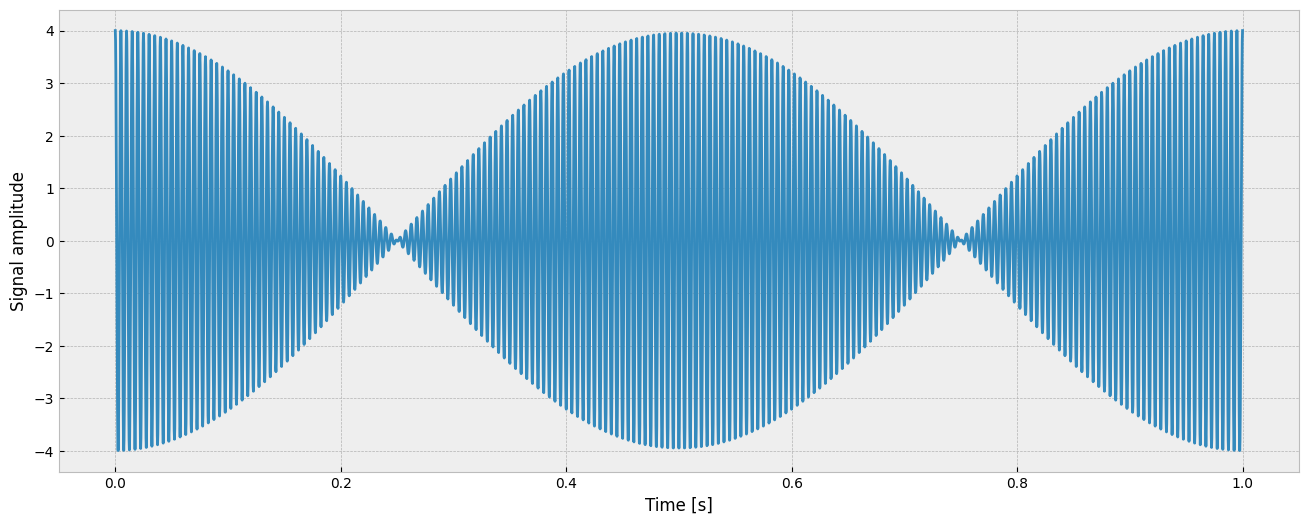

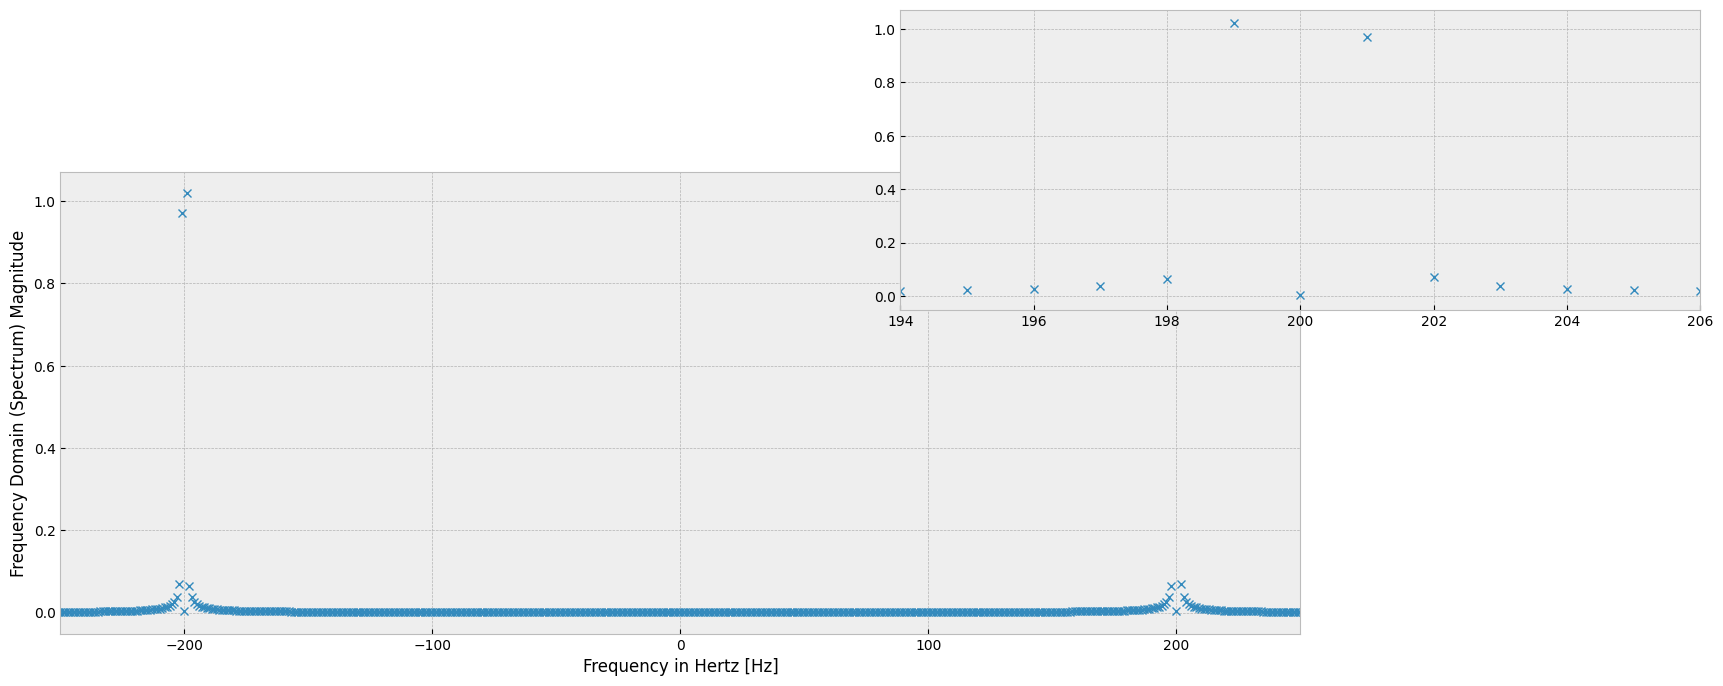

In [15]:
fig, ax = plt.subplots()
ax.plot(tp, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

fig, ax = plt.subplots()
#ax.stem(freqs, absX)
ax.plot(freqs, absX,'x')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude');
ax.set_xlim(-freq_c - 50, freq_c + 50);

# this is an inset axes over the main axes
ax2 = plt.axes([0.65, 0.65, 0.5, 0.5])
ax2.plot(freqs, absX,'x')
#ax2.stem(freqs, absX)
ax2.set_xlim(freq_c - freq_m - 5, freq_c + freq_m +5);

## Demodulation

1. Multiply the passband received signal by $2 \cos\left(2\pi f_\mathrm{c}t\right)$ as shown in Fig. 3.5.
2. Lowpass filter

Let's see first the equations. Defining the demodulation function.

In [16]:
demod = 2 * sp.cos(2*sp.pi*fc*t)
demod

Remember the modulated signal (received)

In [17]:
modulated

In [18]:
recovering = modulated*demod
recovering

Remember that $\cos^2(x) =1 -  \sin^2(x)$, we have that if the signal is filtered in lowpass: $ 2 A A_m \cos(2 \pi f_m t)$.

Back to the numerical analysis.

In [19]:
#Converting sympy formulas to numpy to improve numerical evaluation
demod_sig = sp.lambdify(t,demod.subs(fc,freq_c),"numpy")

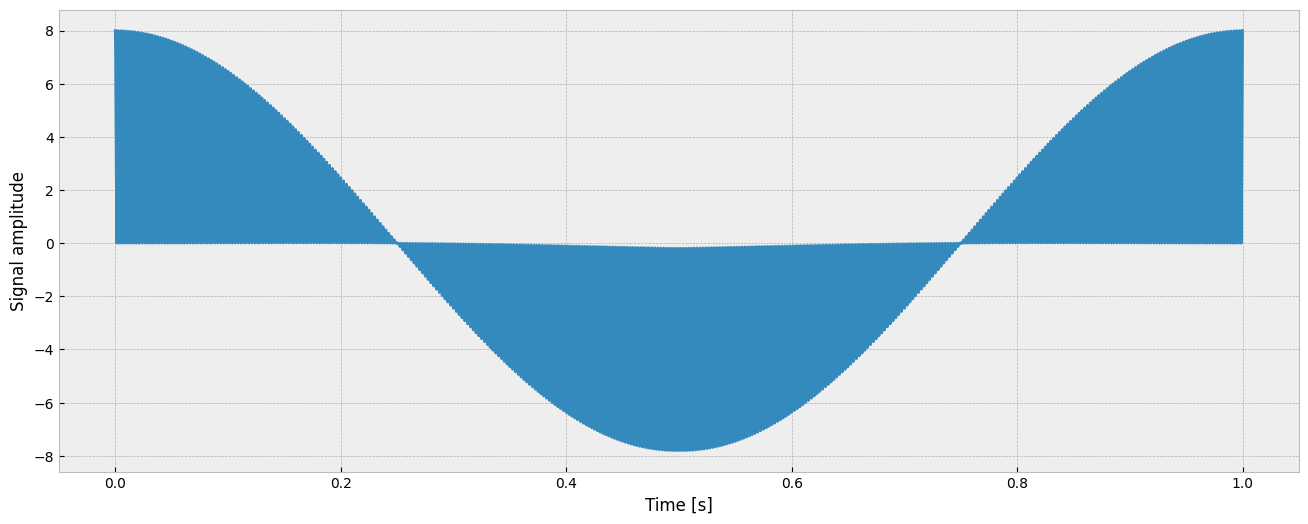

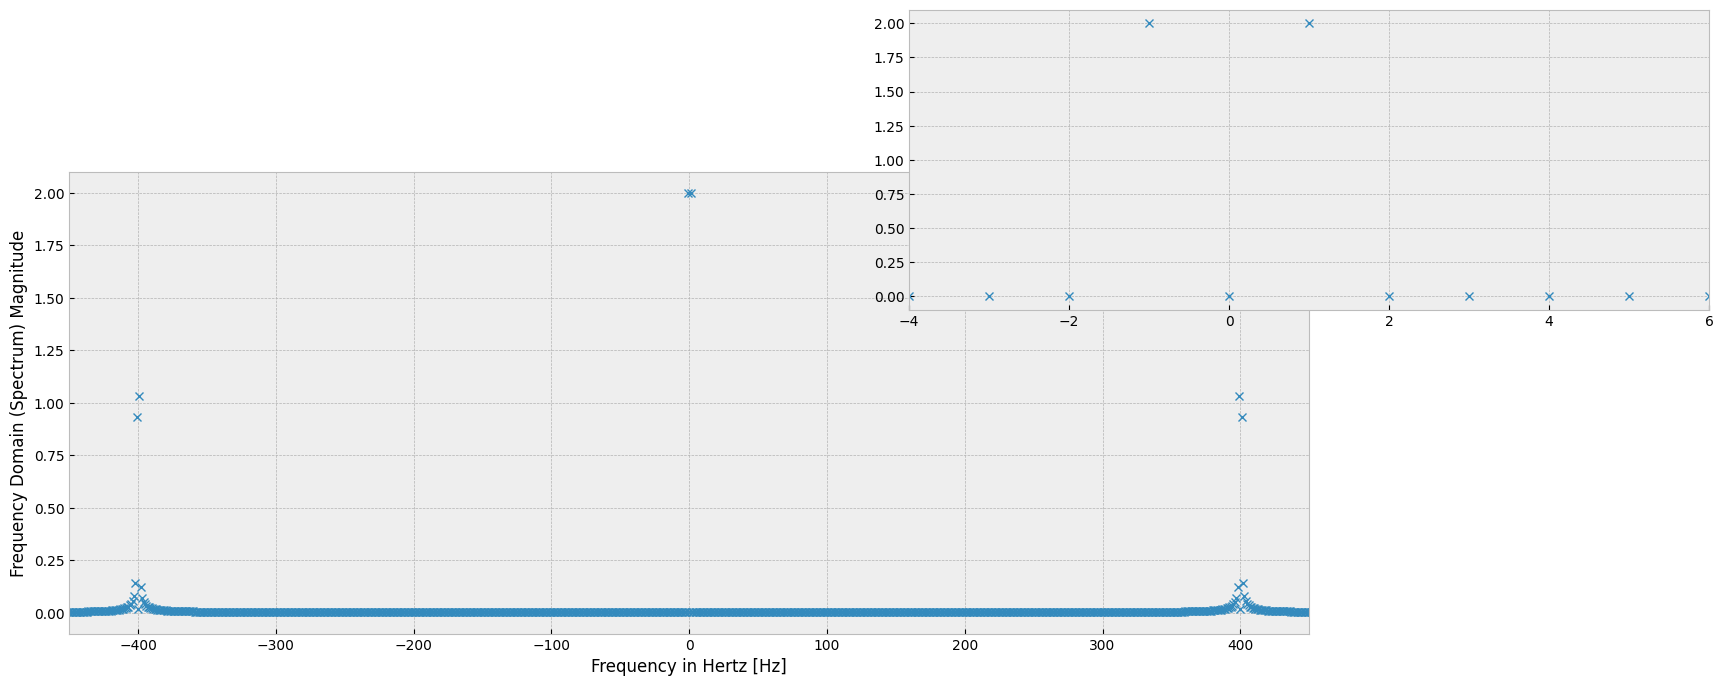

In [31]:
x = modulation_only(tp)*message(tp)*demod_sig(tp)
fig, ax = plt.subplots()
ax.plot(tp, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
X = fftpack.fft(x)/ fp
freqs = fftpack.fftfreq(len(x)) * fp

fig, ax = plt.subplots()
#ax.stem(freqs, np.abs(X))
ax.plot(freqs, np.abs(X),'x')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-2*freq_c - 50, 2*freq_c + 50);

# this is an inset axes over the main axes
ax2 = plt.axes([0.65, 0.65, 0.5, 0.5])
ax2.plot(freqs, np.abs(X),'x')
#ax2.stem(freqs, absX)
ax2.set_xlim(freq_m - 5, freq_m +5);

# Demodulating: getting the baseband signal and then Inverse FFT. 

We are going to use [sk_dsp_comm.sigsys as ss](https://scikit-dsp-comm.readthedocs.io/en/latest/sigsys.html) to help plotting the perfect low-pass filter.

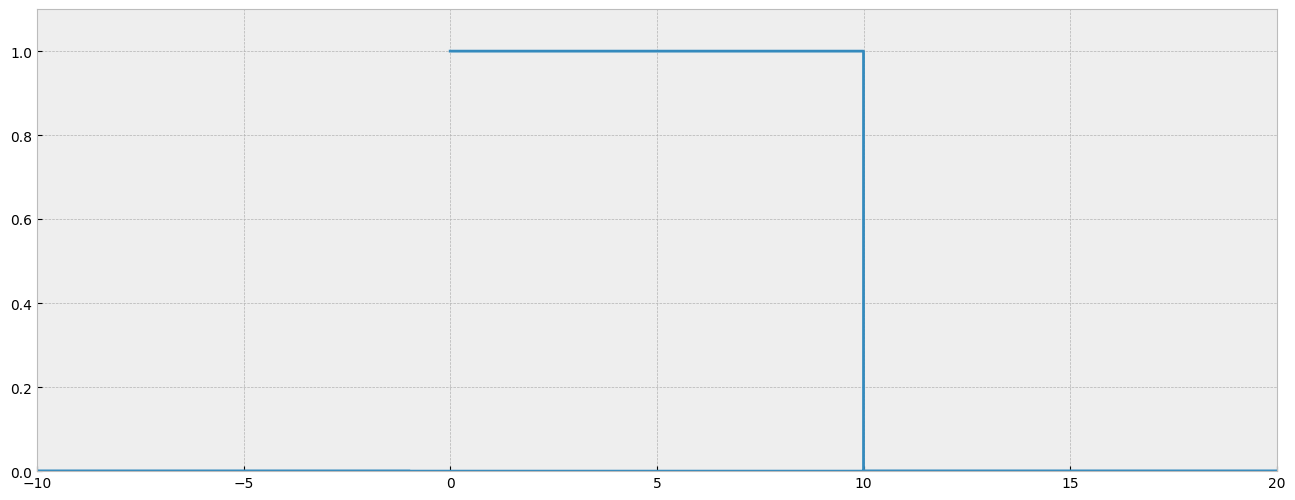

In [21]:
filt_freq_center = 5
filt_width = 10
low_pass_filter = ss.rect(freqs-filt_freq_center,filt_width) #pass frenquences
plt.step(freqs,low_pass_filter);
plt.axis([-filt_width, 2 * filt_width , 0, 1.1]);

Now filtering (by multiplying the Fourier transforms).

In [22]:
demod_freq = low_pass_filter*np.abs(X);

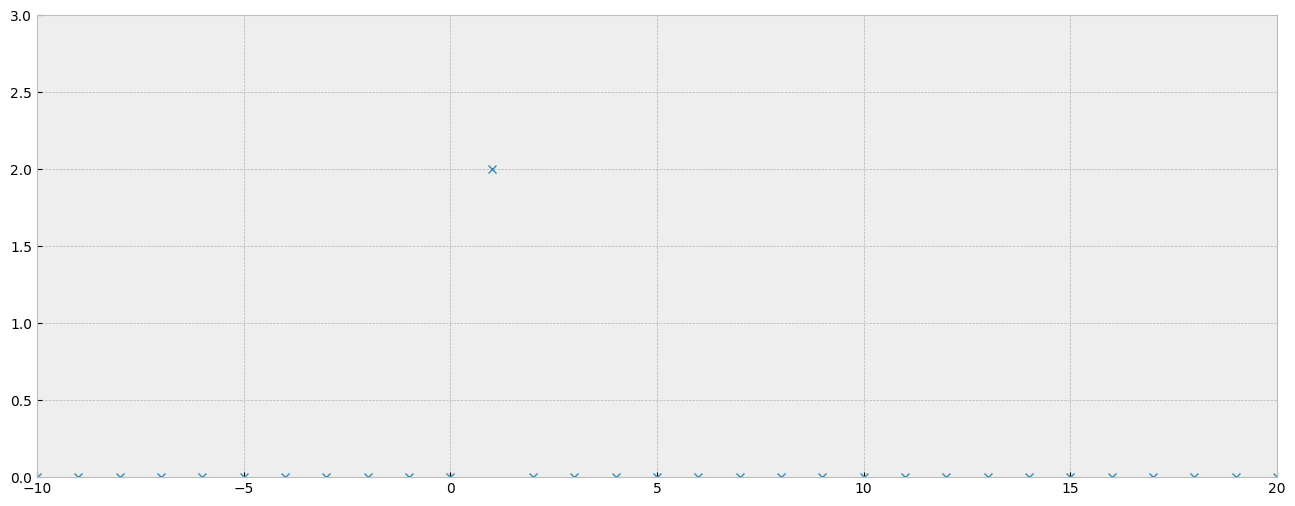

In [23]:
#plt.stem(freqs,low_pass_filter*np.abs(X));
plt.plot(freqs,demod_freq,'x');
plt.axis([-filt_width, 2 * filt_width , 0, amp_m + 1]);

From the fourier inverse ifft.

In [24]:
demod_message = fftpack.ifft(demod_freq)*fp

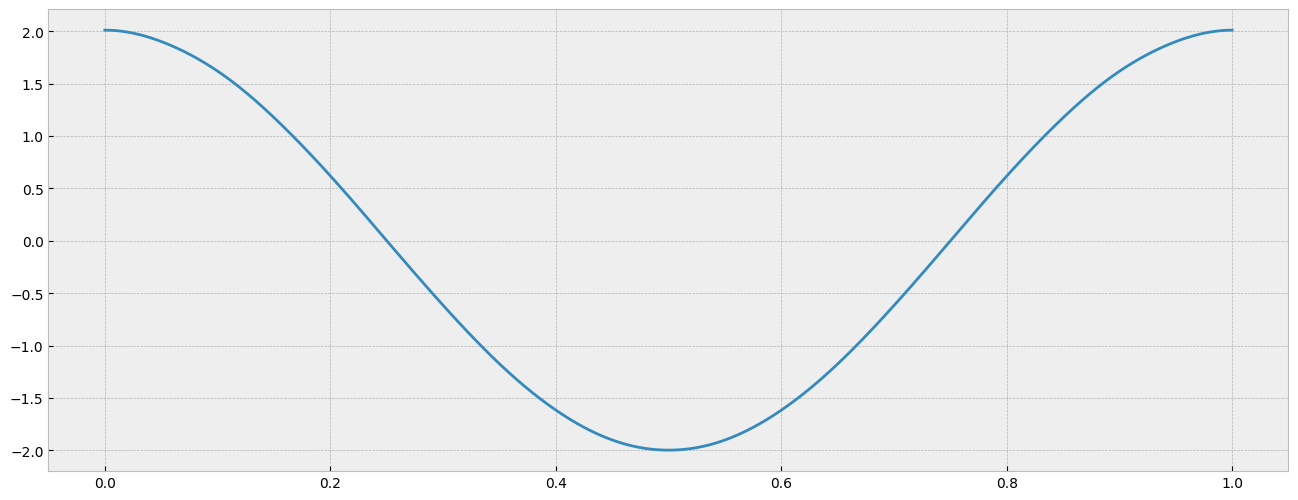

In [25]:
plt.plot(tp,demod_message);

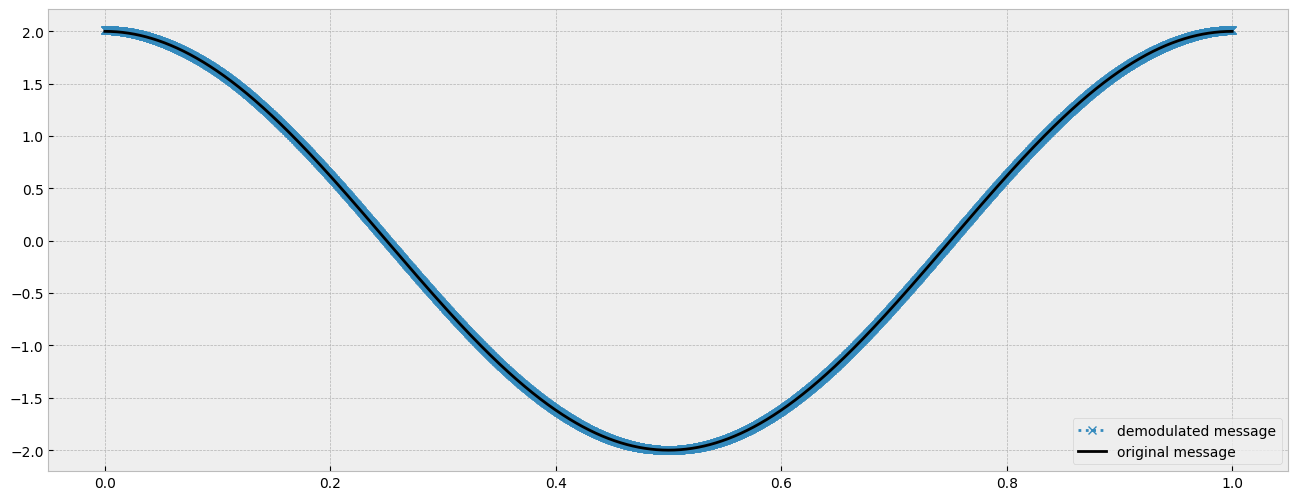

In [26]:
plt.plot(tp,demod_message,'x:',label='demodulated message')
plt.plot(tp,message(tp),'k-', label='original message')
plt.legend(loc='lower right');